# GWAS Lab

In this lab we will be running a GWAS with data from *Arabidopsis thaliana*.

## The Data

The data for this lab comes from [The 1001 Genomes Project](https://1001genomes.org/), specifically the [EasyGWAS website](https://easygwas.biochem.mpg.de/down/1/). 

The genomic data are in three files in /mnt/research/PLB812_FS24_S001/08_GWAS_Josephs/

`arabidopsis.bed` has the genotypes for every individual in the dataset. <br>
`arabidopsis.bim` has the locations of every SNP in `genotype.ped` <br>
`arabidopsis.fam` tells you the order of the genotypes in the file.

The phenotypic data is in `phenotypes.pheno`.


## Installing GEMMA

We will be using the software [GEMMA](https://github.com/genetics-statistics/GEMMA) to run the GWAS. The HPCC does not maintain GEMMA, but it is pretty easy to get running on your own. 

First, use wget to download GEMMA. I find it easiest to make an "Apps" folder in my home directory on the HPCC that I use to keep the programs I download, but it doesn't actually matter where you download this file.

`$ wget https://github.com/genetics-statistics/GEMMA/releases/download/v0.98.5/gemma-0.98.5-linux-static-AMD64.gz`

Next, use gunzip to uncompress the file.

`$ gunzip gemma-0.98.5-linux-static-AMD64.gz`

Use chmod to make this file executable. 

`$chmod u+x gemma-0.98.5-linux-static-AMD64`

Now, run the file to check to see what happens

`$ ./gemma-0.98.5-linux-static-AMD64`

If everything is working right you should get an introductory message about the program.

## Running a simple GWAS

### Making the phenotype file (Emily has already done this for you but I left the code here in case you need it).

We need to add our phenotypes to the **.fam** file. We'll be looking at the trait **DTF1** which describes days until bolting. This is an important reproductive trait. This is the fourth trait in the phenotype file **phenotypes.pheno**.

First, rename the `arabidopsis.fam` file so you have it for later.

`$mv arabidopsis.fam arabidopsis-old.fam`

Below is some code to do this. Note that you will need to change the paths to the fam, pheno, and out files.


In [39]:
#open the files
famFile = open("/mnt/research/PLB812_FS24_S001/08_GWAS_Josephs/arabidopsis.fam",'r')
phenoFile = open('/mnt/home/josep993/plb812/gwas-data/phenotypes.pheno','r')

#make a dictionary for the phenotype data
phenoDict = {}

#read in the phenotype data
phenos = phenoFile.readlines()
for phen in phenos:
    p = str.split(phen)
    dtf=p[8]
    if (dtf=='nan'):
        dtf="-9"
    #change the NA strings
    #add to the dictionary where key is the genotype and the value is the phenotype
    phenoDict[p[1]]= dtf
phenoFile.close()

#open the output file
outFile = open("/mnt/home/josep993/plb812/gwas-data/arabidopsis.fam","w")

#read in the genotype file -- we want our output to be in this order!
genos = famFile.readlines()
for geno in genos:
    g = str.split(geno)
    #make the output line from the genotype file plus the phenotype
    newg = [*g[0:5],phenoDict[g[1]],'\n']
    myout = '    '.join(newg)
    outFile.write(myout)

#close all the files
famFile.close()
outFile.close()

### Running the GWAS

Here is the code for running the GWAS.

`../../Apps/gemma-0.98.5-linux-static-AMD64 -bfile arabidopsis -lm 2 -n 1 -o dtf`

You can read the manual for all the options, but note that the **-lm** flag sets the type of model to run, and the **-n** flag tells you which phenotype to use if the **.fam** file has multiple phenotypes.

I'm not sure if HPCC will handle the whole class running GEMMA on the same development node at the same time, so you may want to put this code into a bash script and submit it to slurm. As a reminder, here is a guide to do this: https://docs.icer.msu.edu/Job_Script_and_Job_Submission/. Also, keep in mind that you can edit bash script files in ondemand.


## Looking at the data

I wrote a short R script to make a manhattan plot of the data.

`$module load R-bundle-CRAN/2023.12-foss-2023a`

`$Rscript --vanilla manplot.R [path to gemma output] [output file name]`

The R script makes a manhattan plot and a qq plot in an .eps format. Download these plots and investigate them. 

## Running a mixed model GWAS

Next, we will run a mixed model GWAS that accounts for relatedness between the Arabidopsis samples.


### Making a kinship matrix

This command makes a kinship matrix.

`$../../Apps/gemma-0.98.5-linux-static-AMD64 -bfile arabidopsis -gk 2 -o arabidopsis`

the **-gk** flag tells GEMMA that we want to make a standardized kinship matrix (instead of a centered one). You can read more in the manual about the distinction between these two options.

### Running the GWAS

This is the command for running the GWAS with our new kinship matrix. 

`$../../Apps/gemma-0.98.5-linux-static-AMD64 -bfile /mnt/research/PLB812_FS24_S001/08_GWAS_Josephs/arabidopsis -k /mnt/home/brottlu1/output/arabidopsis.sXX.txt -lmm 2 -n 1 -o dtf-mixed`

We can make more plots with the R script.

`$Rscript --vanilla manplot.R [path to gemma output] [output file name]`
/mnt/research/PLB812_FS24_S001/08_GWAS_Josephs/manplot-pdf.R or manplot.R

 


### Questions 

1) Please add both of your manhattan plots and both of your qq plots to the ipython notebook that you submit.


2) How do the Manhattan plots of the simple GWAS and the mixed model GWAS differ?
   
3) How do the QQ Plots of the simple GWAS and the mixed model GWAS differ?

1. 
simple GWAS 
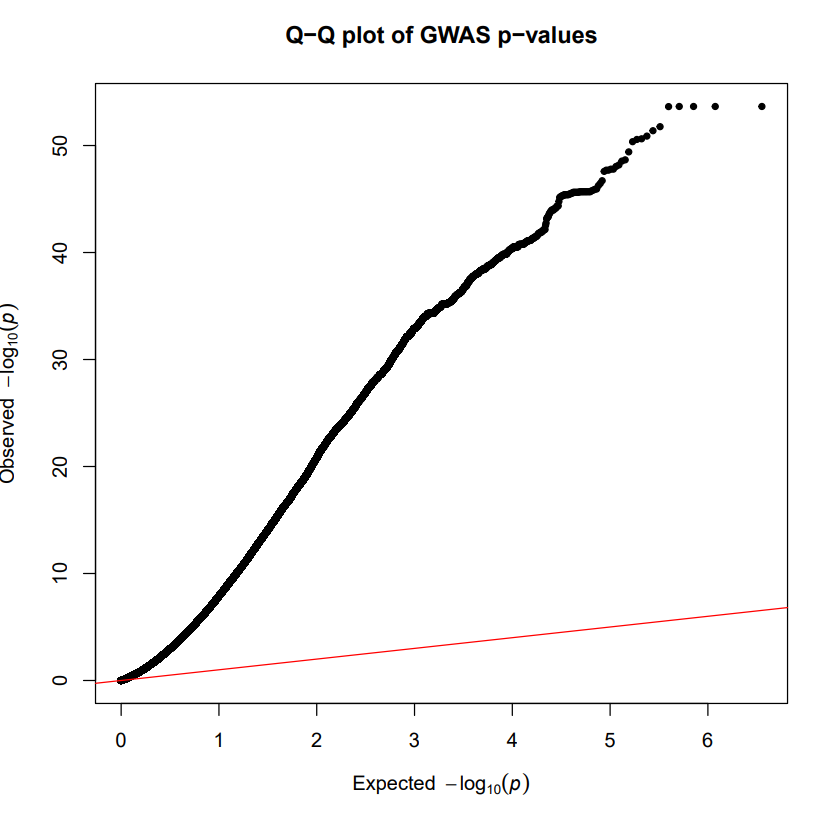
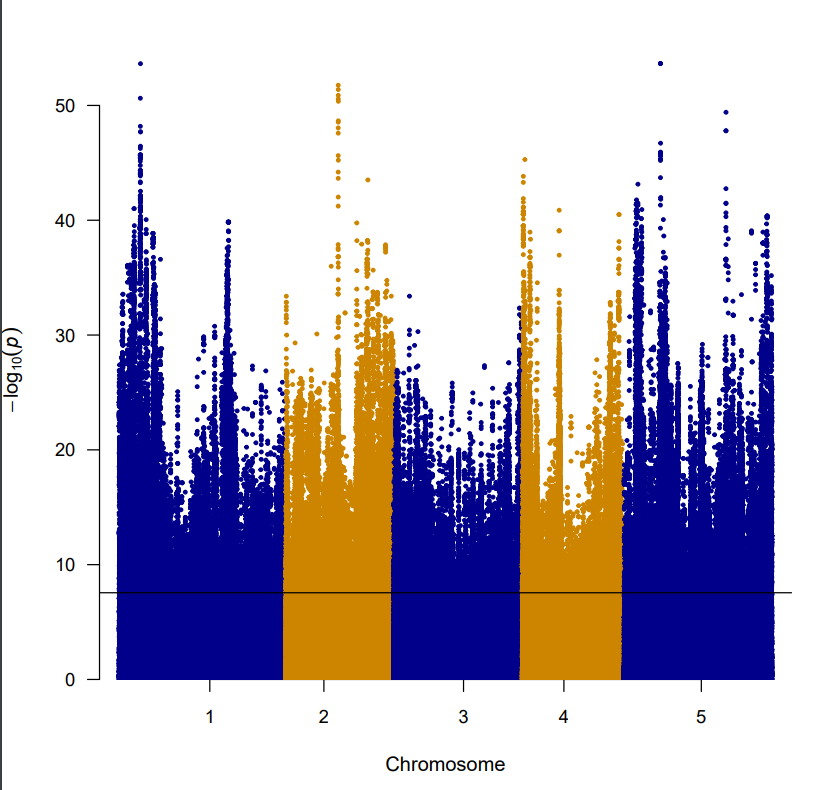

mixed model 
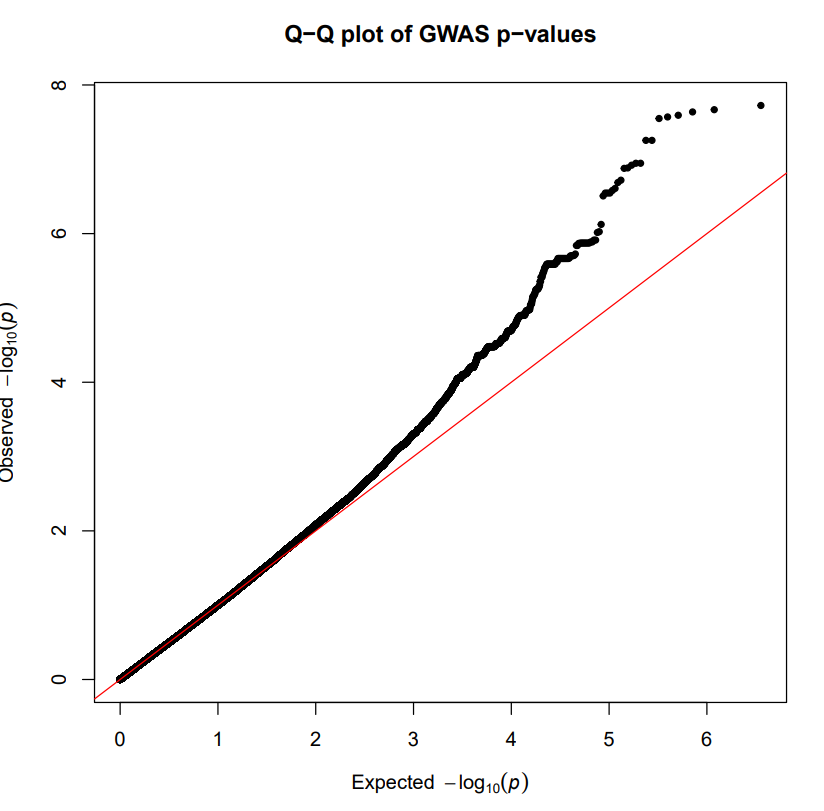
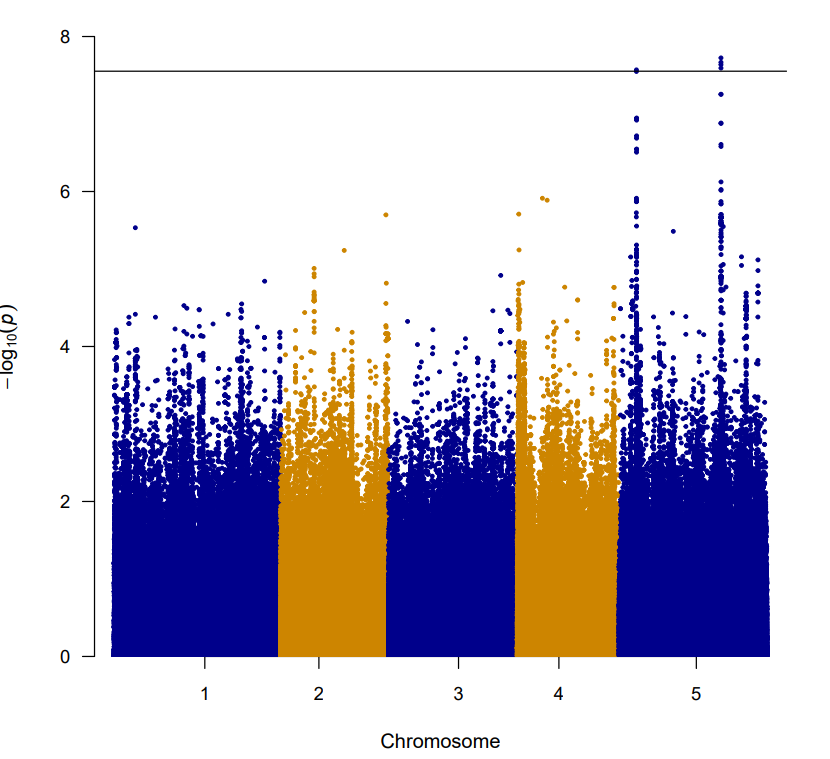

2. The mixed model has a higher p-value that only captures a few of the SNPs of interest instead of having a lot from all the chromosomes 

3. The simple GWAS immediately deviates from the p-value indicating an error. Th